<a href="https://colab.research.google.com/github/strawndri/tmcc-voculary/blob/feature%2Freconhecimento-texto/reconhecimento-texto/testes-reconhecimento-texto/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install langdetect

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,354 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
import pytesseract as pt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from langdetect import detect

In [3]:
!mkdir tessdata

In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [249]:
def extrair_texto(imagem):

    codigos = {
        'en': 'eng',
        'es': 'spa',
        'fr': 'fra',
        'id': 'ind',
        'it': 'ita',
        'ja': 'jpn',
        'pt': 'por',
        'th': 'tha',
        'uk': 'ukr',
        'zh-cn': 'chi_sim',
        'zh-tw': 'chi_tra'
    }

    img = cv2.imread(imagem)
    img_redimensionada = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    img_suavizada = cv2.GaussianBlur(img_redimensionada, (5, 5), 0)
    img_detalhes = 12 * cv2.subtract(img_redimensionada, img_suavizada)
    img = cv2.add(img_redimensionada, img_detalhes)

    media_intensidade = np.mean(img)

    if media_intensidade < 128:
      img = cv2.convertScaleAbs(img, alpha = 1.5, beta = 50)

    img_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img_threshold = cv2.threshold(img_cinza, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # img_threshold = cv2.adaptiveThreshold(img_realce, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 3)

    # Verificando se a imagem tem mais pixels pretos do que brancos
    if cv2.countNonZero(img_threshold) < (img_threshold.size / 2):
        # Inversão de cores
        img_threshold = 255 - img_threshold

        # kernel = np.ones((1, 1), np.uint8)
        # img_threshold = cv2.erode(img_threshold, kernel, iterations=2)

    img = img_threshold

    try:
        idioma = codigos[detect(pt.image_to_string(img))]
    except:
      idioma = "eng"

    texto = pt.image_to_string(img, lang=idioma, config='--tessdata-dir tessdata')
    imagem = cv2_imshow(img)

    return imagem, texto

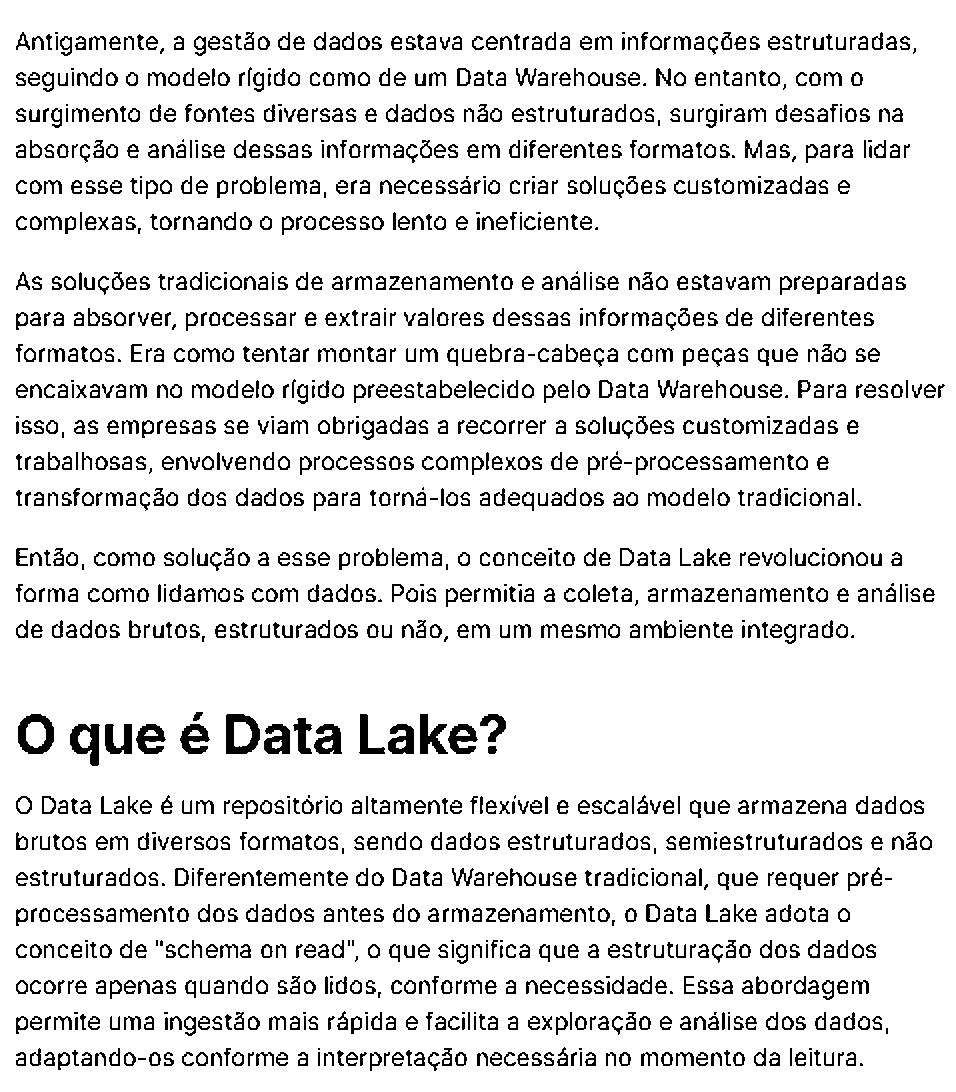

(None,
 'Antigamente, a gestão de dados estava centrada em informações estruturadas,\nseguindo o modelo rígido como de um Data Warehouse. No entanto, com o\nsurgimento de fontes diversas e dados não estruturados, surgiram desafios na\nabsorção e análise dessas informações em diferentes formatos. Mas, para lidar\ncom esse tipo de problema, era necessário criar soluções customizadas e\ncomplexas, tornando o processo lento e ineficiente.\n\nAs soluções tradicionais de armazenamento e análise não estavam preparadas\npara absorver, processar e extrair valores dessas informações de diferentes\nformatos. Era como tentar montar um quebra-cabeça com peças que não se\nencaixavam no modelo rígido preestabelecido pelo Data Warehouse. Para resolver\ni8so, as empresas se viam obrigadas a recorrer a soluções customizadas e\ntrabalhosas, envolvendo processos complexos de pré-processamento e\ntransformação dos dados para torná-los adequados ao modelo tradicional.\n\nEntão, como solução à esse problema,

In [250]:
extrair_texto('/content/drive/MyDrive/VocsImages/artigo.png')

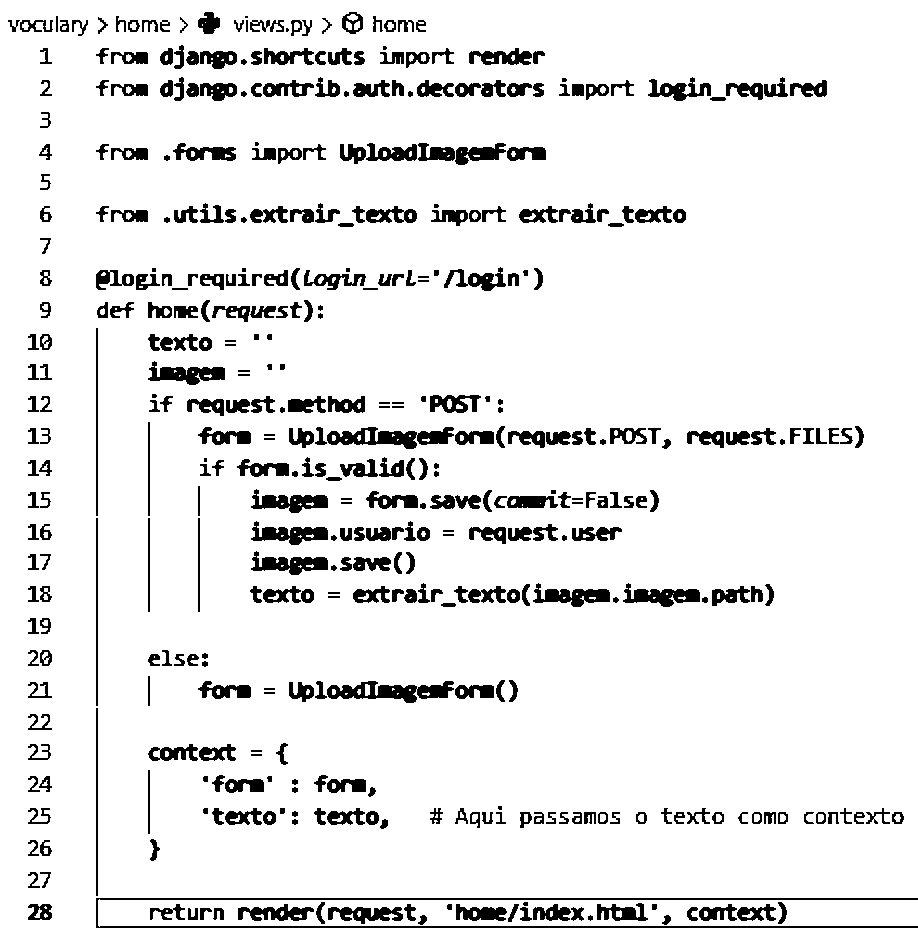

voculary » home > @0 views.py > @ home

1
2
3
4
5
6
7
8
9

10
11
12
13
14
15
16
17
18
19
20

FRERR

26
27

from django.shortcuts import render
from django.contrib.auth.decorators import login_required

from .forms import UploadimagesForam
from .utils.extrair_texto import extrair_texto

@login_required(Login url="/login")
def home(reguest):
texto = **
imagem = **
if request.method == ‘POST":
form = UploadimagesForm(request.POST, request.FILES)
if form.is_valid():
| images = form.save(comwit=False)
images.usuario = request.user
imagem.save()
texto = extrair_texto(images.images.path)

else:

| form = UploadImagesForm()

context = {

‘form’ : form,

‘texto’: texto, # Aqui passamos o texto como contexto
}

 

 

return render(request, ‘home/index.html’, comtext)

 



In [251]:
img, texto = extrair_texto('/content/drive/MyDrive/VocsImages/codigo.png')
img
print(texto)